In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from natsort import natsorted

In [ ]:
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(r'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [ ]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [ ]:
a = 1

In [ ]:
folder_path = r"H:\phd stuff\tidy3d\data\08_23_2024 chi 0.2 N484 Gap Good One\z_incidence"
transmitted_fluxes = []
for i,filename in enumerate(natsorted(os.listdir(folder_path))):
    print(filename)
    plt.figure(figsize=(15, 10))
    file=os.path.join(folder_path, filename)
    sim_object_result = AM.loadFromFile(key = tidy3dAPI, file_path=file)
    print(sim_object_result.__str__())
    sim_data = sim_object_result.sim_data
    sim_data0 = sim_object_result.sim_data0
    transmission0 = sim_data0['flux1'].flux
    transmission = sim_data['flux1'].flux
    transmission_left0 = sim_data0['flux2'].flux
    transmission_left = sim_data['flux2'].flux
    transmission_normalized_left = transmission_left / transmission_left0
    transmission_normalized = transmission / transmission0
    transmitted_fluxes += [transmission_normalized]
    monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
    # plt.plot(monitor_lambdas,transmission_normalized, label=f"L=Right")
    # plt.plot(monitor_lambdas,transmission_normalized_left, label=f"L=Left")
    # plt.xlabel(r'$\nu$')
    # plt.ylabel('Transmission')
    # plt.legend()
    # plt.grid()
    # plt.yscale("log")
    # plt.title(filename)
    # plt.show()

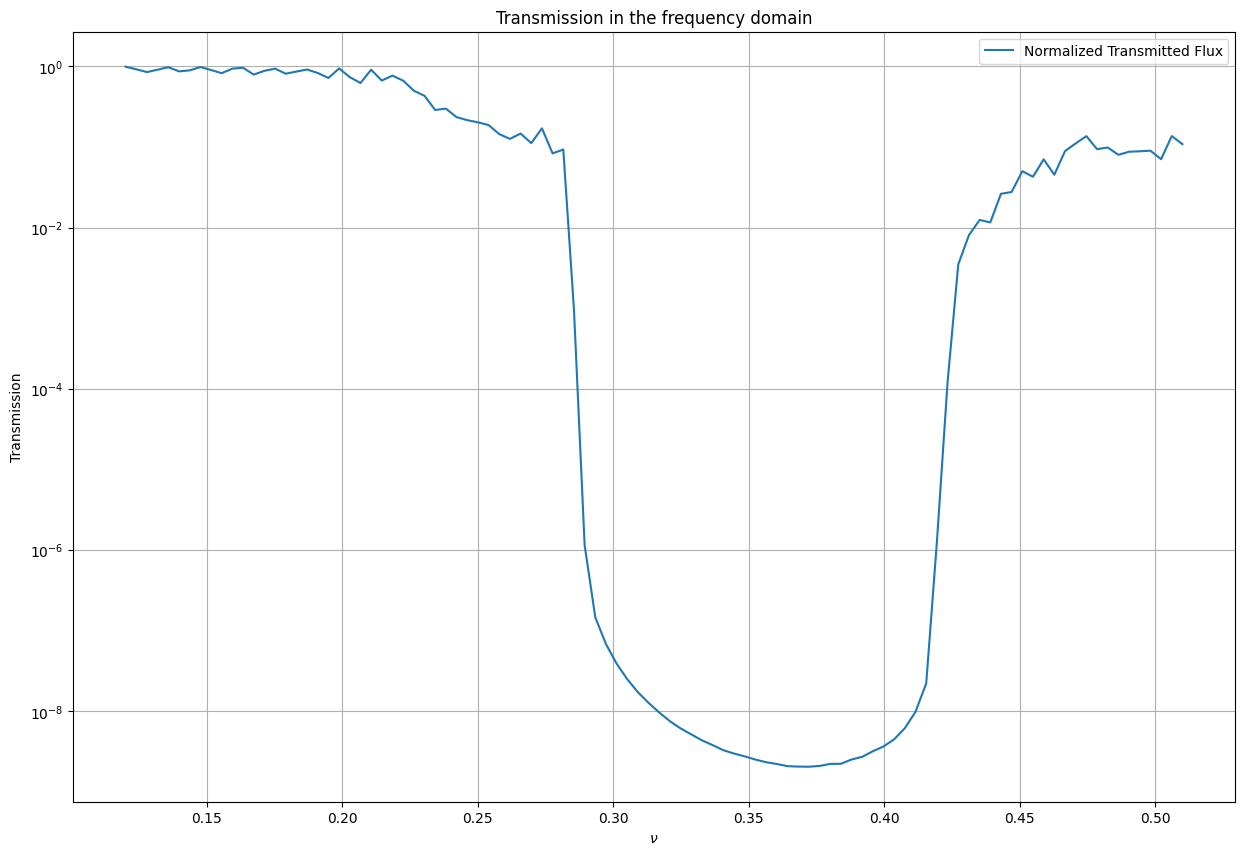

In [15]:
plt.figure(figsize=(15, 10))
mean_trans = np.mean(transmitted_fluxes,axis=0)
plt.plot(monitor_lambdas,mean_trans, label=f"Normalized Transmitted Flux")
plt.xlabel(r'$\nu$')
plt.ylabel('Transmission')
plt.legend()
plt.grid()
plt.yscale("log")
plt.title("Transmission in the frequency domain")
plt.show()